In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
'''
The Titanic dataset, available on Kaggle under the competition “Titanic: Machine Learning from Disaster”, contains information about
passengers who were aboard the RMS Titanic and is widely used for learning and practicing machine learning techniques. The dataset is 
divided mainly into two files: train.csv and test.csv. The train.csv file includes detailed information for 891 passengers along with
a target column called Survived, which indicates whether a passenger survived (1) or did not survive (0) the disaster; this file is 
used to train predictive models. The test.csv file contains similar passenger information for 418 passengers but does not include the
Survived column; it is used to evaluate the model by predicting survival outcomes, which are then submitted to Kaggle for scoring. 
Common features in both files include passenger class, name, sex, age, number of relatives aboard, ticket details, fare, cabin, and port
of embarkation, making the dataset suitable for analyzing factors that influenced survival on the Titanic.
'''

'\nThe Titanic dataset, available on Kaggle under the competition “Titanic: Machine Learning from Disaster”, contains information about\npassengers who were aboard the RMS Titanic and is widely used for learning and practicing machine learning techniques. The dataset is \ndivided mainly into two files: train.csv and test.csv. The train.csv file includes detailed information for 891 passengers along with\na target column called Survived, which indicates whether a passenger survived (1) or did not survive (0) the disaster; this file is \nused to train predictive models. The test.csv file contains similar passenger information for 418 passengers but does not include the\nSurvived column; it is used to evaluate the model by predicting survival outcomes, which are then submitted to Kaggle for scoring. \nCommon features in both files include passenger class, name, sex, age, number of relatives aboard, ticket details, fare, cabin, and port\nof embarkation, making the dataset suitable for anal

In [15]:
PATH = './data'

test_df = pd.read_csv(PATH + '/test.csv')
train_df = pd.read_csv(PATH + '/train.csv')

In [16]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

In [19]:
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

train_df = pd.get_dummies(train_df, columns=["Embarked"], dtype=int)


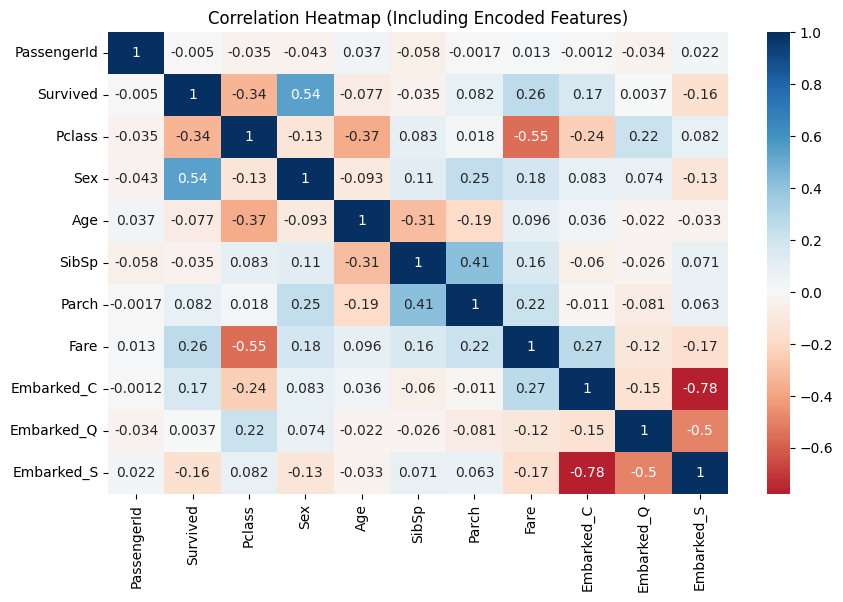

In [20]:
corr = train_df.corr()

plt.figure(figsize=(10, 6))

# 3. Create the Heatmap
sns.heatmap(corr, annot=True, cmap='RdBu', center=0)

plt.title('Correlation Heatmap (Including Encoded Features)')
plt.show()

In [23]:
from sklearn.metrics import matthews_corrcoef

phi = matthews_corrcoef(train_df['Sex'], train_df['Survived'])
print(phi)

0.5433513806577551


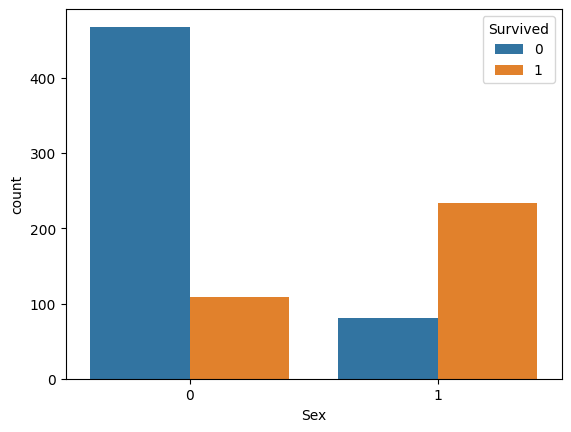

In [24]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.show()